# Effect of incorrect model assumptions in modeling a log-linear stochastic process

This document showcases the use of several approaches into modeling a set of data for which the true generating process is known.

### Generating the data

The data follows the log-linear model, i.e. for a vector of inputs $\bar{x}$ the output is drawn from the Poisson distribution with the expected value of $\exp(\bar{\beta} \cdot \bar{x})$, where $\bar{\beta}$ is the parameter vector of the model. We create a sample of two input variables $x_1\in \mathbb{R}$ and $x_2\in \mathbb{N}$, and the corresponding outputs $\bar{y}$. These samples are then split into training set and test set. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
import statsmodels.api as sm


# Training sample size (test sample size is this *3)
samples = 500

## Create the simulated data                                                                                                                                            
#
# True parameter values                                                                                                                                                 
b0, b1, b2 = 0.1, -0.15, 0.2

# Input variables
np.random.seed(134)
# narrower range
x1 = np.random.normal(15,3, 4*samples)
x2 = np.random.poisson(15, 4*samples)
D = np.stack((x1,x2), axis=1)

# wider range
x3 = np.random.normal(15,9, 4*samples)
x4 = np.random.poisson(15, 4*samples)
D2 = np.stack((x3,x4), axis=1)

# Output variables from log-linear model
y = np.random.poisson([np.exp(b0+b1*x1[a]+b2*x2[a]) for a in range(4*samples)])
y2 = np.random.poisson([np.exp(b0+b1*x3[a]+b2*x4[a]) for a in range(4*samples)])

The following two plots show the simulated data, as output against each input variable. The continuous line shows the expectation level for the mean value of the other input parameter.

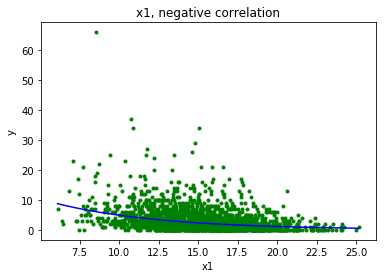

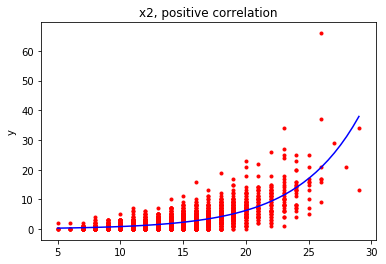

In [6]:
#plt.subplot(211)
plt.plot(np.linspace(min(x1), max(x1)), [np.exp(b0+b1*a+b2*np.mean(x2)) for a in np.linspace(min(x1), max(x1))], 'b')
plt.scatter(x1,y, marker='.', c='g')
plt.title('x1, negative correlation')
plt.ylabel("y")
plt.xlabel("x1")
plt.show()
#plt.subplot(212)
plt.plot(np.linspace(min(x2), max(x2)), [np.exp(b0+b1*np.mean(x1)+b2*a) for a in np.linspace(min(x2), max(x2))], 'b')
plt.ylabel("y")
plt.scatter(x2,y,marker='.',c='r')
plt.title('x2, positive correlation')
plt.show()

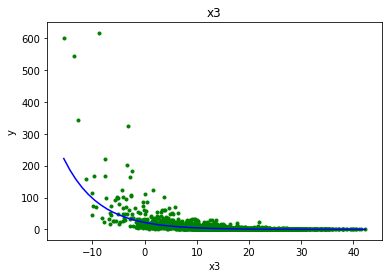

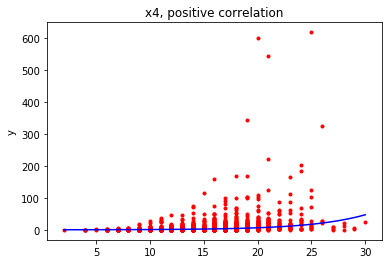

In [8]:
plt.plot(np.linspace(min(x3), max(x3)), [np.exp(b0+b1*a+b2*np.mean(x4)) for a in np.linspace(min(x3), max(x3))], 'b')
plt.scatter(x3,y2, marker='.', c='g')
plt.title('x3')
plt.ylabel("y")
plt.xlabel("x3")
plt.show()
plt.plot(np.linspace(min(x4), max(x4)), [np.exp(b0+b1*np.mean(x3)+b2*a) for a in np.linspace(min(x4), max(x4))], 'b')
plt.ylabel("y")
plt.scatter(x4,y2,marker='.',c='r')
plt.title('x4, positive correlation')
plt.show()

In [10]:
train_X, test_X, train_y, test_y = skl.train_test_split(D, y, test_size=0.75)
train_X2, test_X2, train_y2, test_y2 = skl.train_test_split(D2, y2, test_size=0.75)

The next plots show the split between training and testing sets.

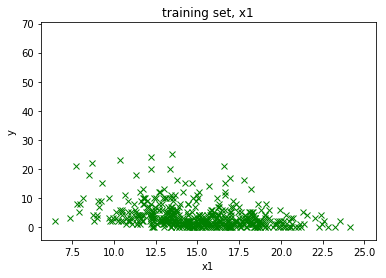

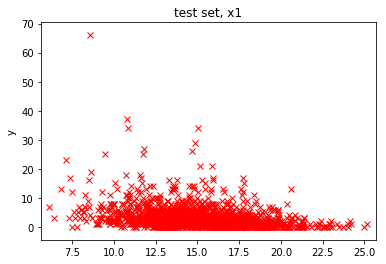

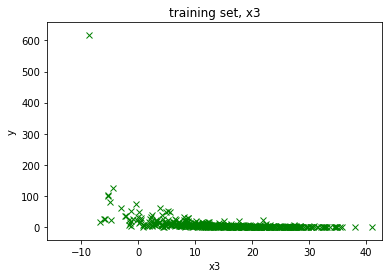

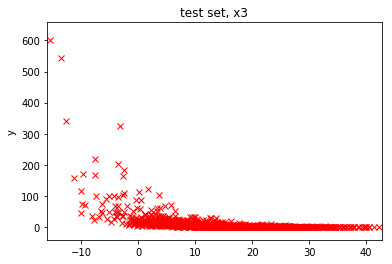

In [11]:
plt.plot(train_X[:,0],train_y, 'gx')
plt.ylabel("y")
plt.xlabel("x1")
plt.xlim(min(x1)-0.5, max(x1)+0.5)
plt.ylim(min(y)-max(y)/15, max(y)+max(y)/15)
plt.title('training set, x1')
plt.show()
plt.plot(test_X[:,0],test_y, 'rx')
plt.ylabel("y")
plt.xlim(min(x1)-0.5, max(x1)+0.5)
plt.ylim(min(y)-max(y)/15, max(y)+max(y)/15)
plt.title('test set, x1')
plt.show()
plt.plot(train_X2[:,0],train_y2, 'gx')
plt.ylabel("y")
plt.xlabel("x3")
plt.xlim(min(x3)-0.5, max(x3)+0.5)
plt.ylim(min(y2)-max(y2)/15, max(y2)+max(y2)/15)
plt.title('training set, x3')
plt.show()
plt.plot(test_X2[:,0],test_y2, 'rx')
plt.ylabel("y")
plt.xlim(min(x3)-0.5, max(x3)+0.5)
plt.ylim(min(y2)-max(y2)/15, max(y2)+max(y2)/15)
plt.title('test set, x3')
plt.show()

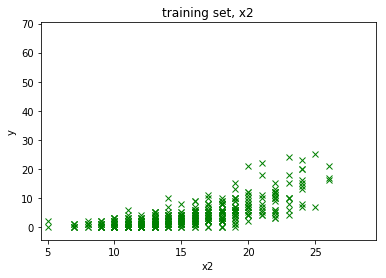

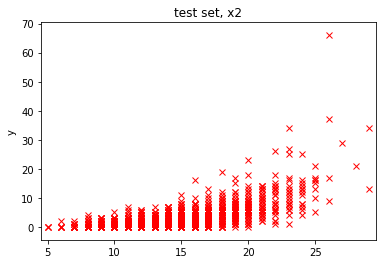

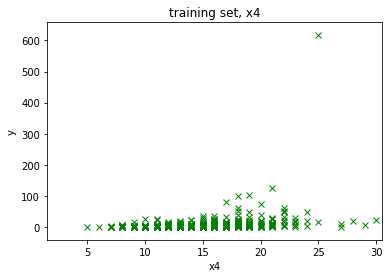

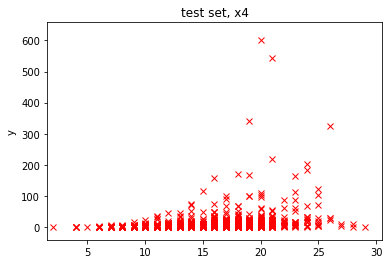

In [12]:
plt.plot(train_X[:,1],train_y, 'gx')
plt.xlim(min(x2)-0.5, max(x2)+0.5)
plt.ylim(min(y)-max(y)/15, max(y)+max(y)/15)
plt.ylabel("y")
plt.xlabel("x2")
plt.title('training set, x2')
plt.show()
plt.plot(test_X[:,1],test_y, 'rx')
plt.xlim(min(x2)-0.5, max(x2)+0.5)
plt.ylim(min(y)-max(y)/15, max(y)+max(y)/15)
plt.ylabel("y")
plt.title('test set, x2')
plt.show()
plt.plot(train_X2[:,1],train_y2, 'gx')
plt.xlim(min(x4)-0.5, max(x4)+0.5)
plt.ylim(min(y2)-max(y2)/15, max(y2)+max(y2)/15)
plt.ylabel("y")
plt.xlabel("x4")
plt.title('training set, x4')
plt.show()
plt.plot(test_X2[:,1],test_y2, 'rx')
plt.xlim(min(x4)-0.5, max(x4)+0.5)
plt.ylim(min(y2)-max(y2)/15, max(y2)+max(y2)/15)
plt.ylabel("y")
plt.title('test set, x4')
plt.show()

### Fitting a log-linear model to the data

We start with the model that happens to match the one producing the data.

In [40]:
modelGLM = sm.GLM(train_y, sm.add_constant(train_X), family=sm.families.Poisson(sm.families.links.log)).fit()
modelGLM2 = sm.GLM(train_y2, sm.add_constant(train_X2), family=sm.families.Poisson(sm.families.links.log)).fit()
print('True param values: ', b0, '\t', b1, '\t\t', b2)
print('Narrow range data:', modelGLM.params)
print('Wider range data: ', modelGLM2.params)

True param values:  0.1 	 -0.15 		 0.2
Narrow range data: [-0.05560164 -0.13345682  0.1965228 ]
Wider range data:  [ 0.14709093 -0.1503842   0.19845659]


The coefficients from these fits are close to the true values, which is not very surprising, but with a smaller sample size this might not be the case.
Let us calculate the mean error in the test set with this model, to get a value we can use to compare the different models. 

In [41]:
avg_Log = np.mean(abs(modelGLM.predict(sm.add_constant(test_X))-test_y))
perc_Log = np.mean(abs(modelGLM.predict(sm.add_constant(test_X))-test_y))/np.mean(test_y)*100
print("\nLog-linear model:\nAverage prediction error in the test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_Log, perc_Log))
avg_Log2 = np.mean(abs(modelGLM2.predict(sm.add_constant(test_X2))-test_y2))
perc_Log2 = np.mean(abs(modelGLM2.predict(sm.add_constant(test_X2))-test_y2))/np.mean(test_y2)*100
print("\nLog-linear model, wider range data:\nAverage prediction error in the test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_Log2, perc_Log2))


Log-linear model:
Average prediction error in the test set is 1.307,
which is 39.6 % of the mean value of y.

Log-linear model, wider range data:
Average prediction error in the test set is 1.665,
which is 19.3 % of the mean value of y.


### Fitting a linear model

Let us start the wrong models with a simple one, the linear model.

In [42]:
modelLinear = sm.OLS(train_y,sm.add_constant(train_X)).fit()
print(modelLinear.summary())
modelLinear2 = sm.OLS(train_y2,sm.add_constant(train_X2)).fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     438.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          2.13e-110
Time:                        18:43:58   Log-Likelihood:                -1166.6
No. Observations:                 500   AIC:                             2339.
Df Residuals:                     497   BIC:                             2352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6843      0.696     -0.983      0.3


Linear model:
Average prediction error in the test set is 1.798,
which is 48.7 % of the mean value of y.


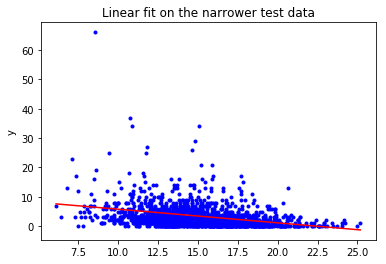


Linear model, the wider ranged data:
Average prediction error in the test set is 8.784,
which is 113.1 % of the mean value of y.


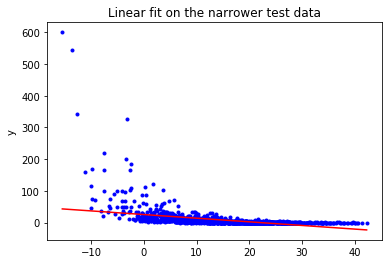

In [44]:
# Narrower data
avg_Lin = np.mean(abs(modelLinear.predict(sm.add_constant(train_X))-train_y))
perc_Lin = np.mean(abs(modelLinear.predict(sm.add_constant(train_X))-train_y))/np.mean(train_y)*100
print("\nLinear model:\nAverage prediction error in the test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_Lin, perc_Lin))
plt.scatter(test_X[:,0], test_y,marker='.',c='b')
plt.plot(np.linspace(min(x1), max(x1)), modelLinear.predict(
    np.stack((np.repeat(1,50),np.linspace(min(x1), max(x1), 50),np.repeat(np.mean(test_X[:,1]),50)), axis=1)
), 'r')
plt.title('Linear fit on the narrower test data')
plt.ylabel("y")
plt.show()

# Wider data
avg_Lin2 = np.mean(abs(modelLinear2.predict(sm.add_constant(train_X2))-train_y2))
perc_Lin2 = np.mean(abs(modelLinear2.predict(sm.add_constant(train_X2))-train_y2))/np.mean(train_y2)*100
print("\nLinear model, the wider ranged data:\nAverage prediction error in the test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_Lin2, perc_Lin2))
plt.scatter(test_X2[:,0], test_y2,marker='.',c='b')
plt.plot(np.linspace(min(x3), max(x3)), modelLinear2.predict(
    np.stack((np.repeat(1,50),np.linspace(min(x3), max(x3), 50),np.repeat(np.mean(test_X2[:,1]),50)), axis=1)
), 'r')
plt.title('Linear fit on the narrower test data')
plt.ylabel("y")
plt.show()

The effectiveness of the linear model is affected quite significantly by the width of the parameter values in the data under scrutiny. Shorter value ranges can often readily be approximated by linear model, as can be seen here -- the fit on the narrower data is not far behind the 'true' model, but as the range increases, the model becomes useless.

### Fitting a gamma-logarithmic model


Gamma model:
Average prediction error in the test set is 1.315,
which is 39.9 % of the mean value of y.


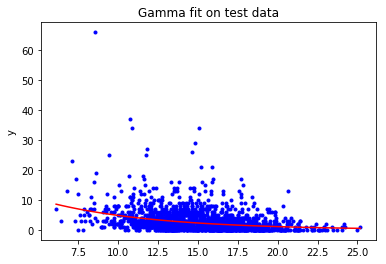


Gamma model:
Average prediction error in the wider test set is 3.628,
which is 42.1 % of the mean value of y.


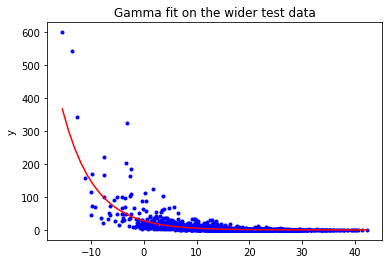

In [54]:
# Narrower data
modelG = sm.GLM(train_y, sm.add_constant(train_X), family=sm.families.Gamma(sm.families.links.log)).fit()
avg_G = np.mean(abs(modelG.predict(sm.add_constant(test_X))-test_y))
perc_G = np.mean(abs(modelG.predict(sm.add_constant(test_X))-test_y))/np.mean(test_y)*100
print("\nGamma model:\nAverage prediction error in the test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_G, perc_G))
plt.scatter(test_X[:,0], test_y,marker='.',c='b')
plt.plot(np.linspace(min(x1), max(x1)), modelG.predict(
    np.stack((np.repeat(1,50),np.linspace(min(x1), max(x1), 50),np.repeat(np.mean(test_X[:,1]),50)), axis=1)
), 'r')
plt.title('Gamma fit on test data')
plt.ylabel("y")
plt.show()

# Wider data
modelG2 = sm.GLM(train_y2, sm.add_constant(train_X2), family=sm.families.Gamma(sm.families.links.log)).fit()
avg_G2 = np.mean(abs(modelG2.predict(sm.add_constant(test_X2))-test_y2))
perc_G2 = np.mean(abs(modelG2.predict(sm.add_constant(test_X2))-test_y2))/np.mean(test_y2)*100
print("\nGamma model:\nAverage prediction error in the wider test set is {:0.3f},\nwhich is {:0.1f} % of the mean value of y.".format(
    avg_G2, perc_G2))
plt.scatter(test_X2[:,0], test_y2,marker='.',c='b')
plt.plot(np.linspace(min(x3), max(x3)), modelG2.predict(
    np.stack((np.repeat(1,50),np.linspace(min(x3), max(x3), 50),np.repeat(np.mean(test_X2[:,1]),50)), axis=1)
), 'r')
plt.title('Gamma fit on the wider test data')
plt.ylabel("y")
plt.show()

### Summary

The fits for the different model assumptions gave the following results:

In [70]:
print('\t\tNARROW DATA\t\t\tWIDE DATA')
print('\t\tavg error\tavg error, %\tavg error\tavg error, %')
print('Log-linear fit \t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}'.format(avg_Log, perc_Log, avg_Log2, perc_Log2))
print('Gamma-log fit \t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}'.format(avg_G, perc_G, avg_G2, perc_G2))
print('Linear fit \t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}\t\t{:0.3f}'.format(avg_Lin, perc_Lin, avg_Lin2, perc_Lin2))

		NARROW DATA			WIDE DATA
		avg error	avg error, %	avg error	avg error, %
Log-linear fit 	1.307		39.632		1.665		19.313
Gamma-log fit 	1.315		39.874		3.628		42.083
Linear fit 	1.798		48.686		8.784		113.077


In a narrower range of the data, many possible models may give quite reasonable fits. The dangers in extrapolating, however, should be apparent: a reasonable fit in some range does not nessesarily mean anything outside that range.